<a href="https://colab.research.google.com/github/whyeon92/ESAA_YB/blob/mini_project/ESAA_miniproject1_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2022.04.08 (금) 23:59

In [1]:
#구글 코랩 환경 사용으로 드라이브 마운트 및 디렉터리 설정
from google.colab import drive
drive.mount('/content/gdrive/')

path = "/content/gdrive/My Drive/ESAAData/"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,573 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121753 files and dire

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
plt.rcParams['axes.unicode_minus'] =False

In [4]:
# 데이터 불러오기
train=pd.read_csv(path + "movies_train.csv")

## [EDA]
+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [5]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [6]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


In [7]:
print(train.shape)
train.info()

(600, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [8]:
train.describe(include = 'all')

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600,600,600,600,600.000000,600,600,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
unique,600,169,12,330,NaN,4,472,NaN,NaN,NaN,NaN,NaN
top,개들의 전쟁,CJ 엔터테인먼트,드라마,2015-10-22,NaN,청소년 관람불가,홍상수,NaN,NaN,NaN,NaN,NaN
freq,1,54,221,6,NaN,204,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,100.863333,NaN,NaN,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,NaN,NaN,NaN,NaN,18.097528,NaN,NaN,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,NaN,NaN,NaN,NaN,89.000000,NaN,NaN,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,NaN,NaN,NaN,NaN,114.000000,NaN,NaN,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05


director의 unique - 472 -> 겹치는 감독이 있다!

In [9]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [10]:
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [11]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [12]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [13]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외) -> train과 test 모두 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.-> 이전에 제작에 참여한 영화가 없다고 하고 0으로 바꿈

In [14]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [15]:
train['release_time']=pd.to_datetime(train['release_time'])

In [16]:
train.describe(include = 'all')

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600,600,600,600,600.000000,600,600,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02
unique,600,169,12,330,NaN,4,472,NaN,NaN,NaN,NaN,NaN
top,개들의 전쟁,CJ 엔터테인먼트,드라마,2015-10-22 00:00:00,NaN,청소년 관람불가,홍상수,NaN,NaN,NaN,NaN,NaN
freq,1,54,221,6,NaN,204,7,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2010-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2015-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,100.863333,NaN,NaN,4.726993e+05,0.876667,151.118333,3.706667,7.081818e+05
std,NaN,NaN,NaN,NaN,18.097528,NaN,NaN,1.309474e+06,1.183409,165.654671,2.446889,1.828006e+06
min,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,NaN,NaN,NaN,NaN,89.000000,NaN,NaN,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03


In [16]:
# 년도, 월, 일, 요일 별 칼럼 따로 만들기
train['release_year']=train['release_time'].dt.year   #년도
train['release_month']=train['release_time'].dt.month   #월
train['release_day']=train['release_time'].dt.day     #일
train['release_weekday']=train['release_time'].dt.weekday   #요일

# 여기부터 코드

Text(0.5, 1.0, '전체 변수 간의 상관계수 히트맵')

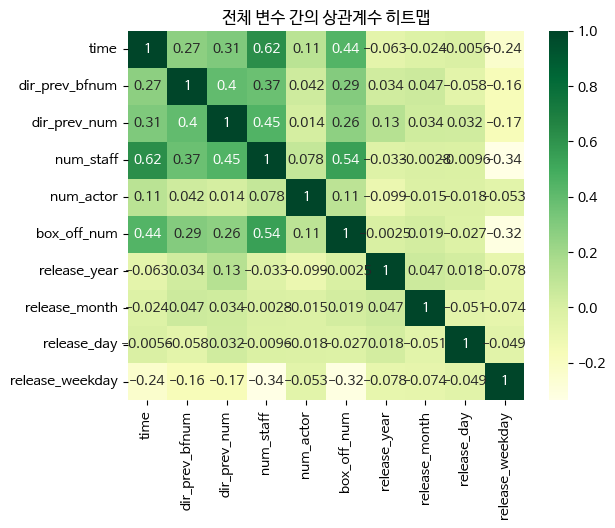

In [29]:
sns.heatmap(train.corr(), annot = True, cmap = 'YlGn')

plt.title('전체 변수 간의 상관계수 히트맵')

Text(0.5, 1.0, '스태프 수와 관객 수 사이의 산점도')

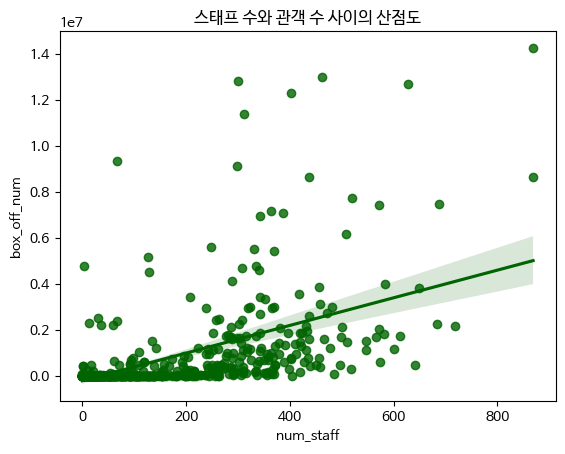

In [42]:
sns.regplot(x = 'num_staff', y = 'box_off_num', data = train, color = 'darkgreen',  fit_reg = True)
plt.title('스태프 수와 관객 수 사이의 산점도')

Text(0.5, 1.0, '장르에 따른 평균 관객 수')

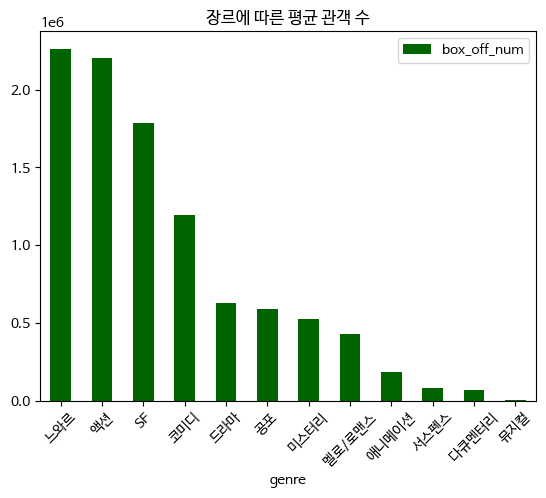

In [37]:
train[['genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num', ascending=False).plot(kind='bar', color = 'darkgreen')
plt.xticks(rotation = 45)
plt.title('장르에 따른 평균 관객 수')